<h1 align ="center"> REST API Reference Samples</h1>
<hr>
   
# Get Embeddings
   
Get a vector representation of a given input that can be easily consumed by machine learning models and other algorithms.
In this example, we'll see how to get embeddings using REST API Call.

In [1]:
!pip install openai


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import json
import requests
import openai
import os

### Setup Parameters


Here we will load the configurations from _config.json_ file to setup deployment_name, openai_api_base, openai_api_key and openai_api_version.

In [10]:
# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)
    
# Setting up the deployment name
deployment_name = config_details['EMBEDDINGS_MODEL']

# The base URL for your Azure OpenAI resource. e.g. "https://<your resource name>.openai.azure.com"
openai_api_base = config_details['OPENAI_API_BASE']

# The API key for your Azure OpenAI resource.
openai_api_key = config_details['OPENAI_API_KEY']

# Currently OPENAI API have the following versions available: 2022-12-01
openai_api_version = config_details['OPENAI_API_VERSION']

print (deployment_name,openai_api_base,openai_api_key)

text-embedding-ada-002 https://openai-tajamar-1.openai.azure.com/ 6daizIjJeCeXabhxYwNxGzpifuynoi0CzR8eTDkfUdvVWUZRDwPXJQQJ99BAACYeBjFXJ3w3AAABACOGgUwM


In [11]:
# Request URL
api_url = f"{openai_api_base}/openai/deployments/{deployment_name}/embeddings?api-version={openai_api_version}"

# Example prompt for request payload
input="The food was delicious and the waiter..."

# Json payload
json_data = {
  "input": input
}

# Setting the API key in the HTTP headers
headers =  {"api-key": openai_api_key}

try:
    # The response will contain embeddings, which you can extract, save, and use.
    response = requests.post(api_url, json=json_data, headers=headers)

    # Getting the JSON object of the result
    embeddings = response.json()
    
    # Print embeddings
    print(embeddings['data'][0]['embedding'][:20])
    
except:
    print("An exception has occurred. \n")
    print("Error Message:", embeddings['error']['message'])

[0.0023481972, -0.009284899, 0.01570119, -0.007710972, -0.0047217803, 0.014863454, -0.009849736, -0.038281962, -0.006930355, -0.028660698, 0.025182828, 0.018112851, -0.0036048, -0.02557631, 0.00049978524, -0.016361222, 0.02827991, 0.0053500817, 0.009652995, -0.016386608]


### Ejercicio 1: Comparar la similitud entre dos frases usando embeddings
# Genera embeddings para dos frases diferentes y calcula la similitud coseno entre ellos.

In [16]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.1 MB 12.0 MB/s eta 0:00:01
   --- ------------------------------------ 1.1/11.1 MB 11.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/11.1 MB 11.6 MB/s eta 0:00:01
   ------- -------------------------------- 2.2/11.1 MB 11.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.1 MB 11.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.1 MB 11.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.1 MB 11.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.4/11.1 MB 11.7 MB/s eta 0:00:01
   ----------------- ---------------------- 4.9/11.1 MB 11.7 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

sentence1 = "The food was amazing and the atmosphere was great."
sentence2 = "The meal was tasty and the environment was pleasant."

json_data1 = {"input": sentence1}
json_data2 = {"input": sentence2}

response1 = requests.post(api_url, json=json_data1, headers=headers)
response2 = requests.post(api_url, json=json_data2, headers=headers)

embedding1 = response1.json()['data'][0]['embedding']
embedding2 = response2.json()['data'][0]['embedding']

similarity = cosine_similarity([embedding1], [embedding2])
print("embedding1:", embedding1)
print("embedding2:", embedding2)
print(f"Similarity between sentences: {similarity[0][0]}")

embedding1: [0.023102028, -0.007956512, 0.019264482, -0.019443568, -0.0066709346, -0.00150144, -0.00097537634, -0.040217485, -0.005350179, -0.024841717, 0.0048481002, 0.009740972, 0.0044739395, -0.025813894, -0.0107259415, 0.014748969, 0.03827313, -0.009939245, -0.0034026243, -0.01412217, -0.027988505, 0.01868885, 0.0025183898, 0.00021706121, -0.003978256, 0.011474263, 0.0023409033, -0.016897995, 0.015567646, 0.020147119, 0.015887441, 0.0010017594, -0.02985611, -0.0045986595, -0.014083795, -0.019392401, -0.028397843, 0.0050559673, 0.013124408, 0.005695558, 0.0053086057, -0.013124408, 0.002871764, 0.020901835, -0.027962921, 0.00038115628, -0.0002380478, 0.0008770392, -0.003639273, -0.004064601, 0.009958433, -0.009331633, -0.021196047, -0.025327805, 0.013162783, 0.009248487, -0.004924851, -0.005439722, 0.02360091, -0.01875281, -0.007860574, 0.009939245, -0.023063652, -0.0043204376, -0.010879444, -0.007579154, -0.024611464, 0.007643113, 0.00584906, 0.01440359, 0.018369054, 0.012024311, 0.

### Ejercicio 2: Clasificación de texto simple usando embeddings
# Genera embeddings para un conjunto de textos y clasifica si pertenecen a la categoría 'positivo' o 'negativo'.


In [21]:
texts = ["I love this product!", "It's terrible, I will not buy it again.", "Absolutely fantastic experience.", "The worst service ever."]
labels = ["positive", "negative", "positive", "negative"]

embeddings = []
for text in texts:
    json_data = {"input": text}
    response = requests.post(api_url, json=json_data, headers=headers)
    embeddings.append(response.json()['data'][0]['embedding'])

for i, embedding in enumerate(embeddings):
    print(f"Text: {texts[i]} - Label: {labels[i]} - Embedding: {embedding[:5]}")


Text: I love this product! - Label: positive - Embedding: [-0.01093095, 0.0032429998, -0.011792726, -0.022535771, -0.013918009]
Text: It's terrible, I will not buy it again. - Label: negative - Embedding: [-0.022774734, -0.00881582, -0.015034635, -0.001327147, -0.018764649]
Text: Absolutely fantastic experience. - Label: positive - Embedding: [-0.012397227, -0.0013213849, 0.005783872, -0.02723789, -0.028446747]
Text: The worst service ever. - Label: negative - Embedding: [-0.014438531, -0.019273035, 0.0043763956, -0.006647443, -0.015881086]


### Ejercicio 3: Visualización de embeddings en 2D usando PCA
# Usa PCA para reducir las dimensiones de los embeddings y visualízalos en un gráfico 2D.

In [23]:
!pip install matplotlib

     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     ------- ------------------------------- 30.7/168.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 168.5/168.5 kB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.6/8.0 MB 12.6 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.0 MB 12.2 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.0 MB 12.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/8.0 MB 11.9 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/8.0 MB 11.9 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.0 MB 11.8 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.0 MB 11.9 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/8.0 MB 11.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.0 MB 11.8 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


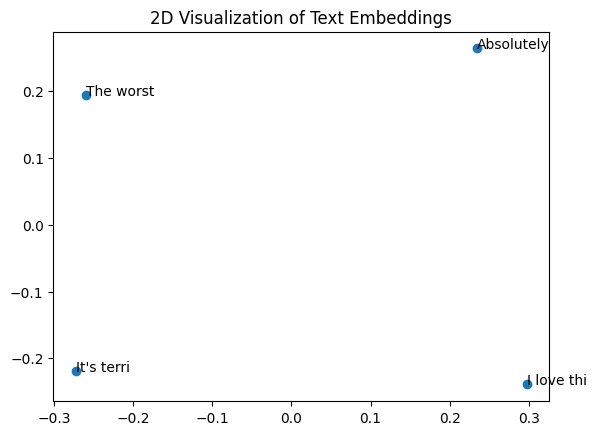

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, text in enumerate(texts):
    plt.annotate(text[:10], (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title("2D Visualization of Text Embeddings")
plt.show()

### Ejercicio 4: Búsqueda de texto similar en una base de datos de embeddings
# Dado un texto de consulta, encuentra el texto más cercano en una lista de documentos almacenados.

In [25]:
query = "I really enjoyed the food."
json_data_query = {"input": query}
response_query = requests.post(api_url, json=json_data_query, headers=headers)
query_embedding = response_query.json()['data'][0]['embedding']

similarities = cosine_similarity([query_embedding], embeddings)
most_similar_index = np.argmax(similarities)

print(f"Most similar text to query: {texts[most_similar_index]}")

Most similar text to query: Absolutely fantastic experience.
